# 과소적합 (underfitting)

우리가 공부했던 과적합을 실험적으로 구현해보겠습니다.  
이진분류에서 다뤘던 신경망과 IMDB 데이터셋으로요.  
![](https://drive.google.com/thumbnail?id=1qyTwfr1hPiFzpAflIPrlbjykCY9XGUT3&sz=s4000)

---
앞에서처럼 훈련 데이터를 직접 나눌수도 있지만 [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit)메서드에서 validation_split 설정으로 편리하게 나눠서 학습시킬수 있습니다.  
0과 1사의 값으로 검증데이터의 비율을 지정해줍니다.  
입력 뉴런의 개수는 데이터가 입력될때 결정됩니다.  
`input_shape`을 정의하지 않은 경우는 첫번째 데이터가 입력될때 그 데이터의 피처수로 입력 뉴런수가 결정이 됩니다.

In [1]:
from tensorflow import keras
from keras.datasets import imdb
from keras import models
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
import numpy as np

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

original_model = keras.Sequential([
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")])

original_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

original_hist = original_model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7115 - loss: 0.6050 - val_accuracy: 0.8681 - val_loss: 0.4144
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8853 - loss: 0.3672 - val_accuracy: 0.8811 - val_loss: 0.3320
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9159 - loss: 0.2661 - val_accuracy: 0.8896 - val_loss: 0.2908
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9336 - loss: 0.2123 - val_accuracy: 0.8923 - val_loss: 0.2749
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9418 - loss: 0.1754 - val_accuracy: 0.8843 - val_loss: 0.2861
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9522 - loss: 0.1492 - val_accuracy: 0.8890 - val_loss: 0.2807
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9650 - loss: 0.1228 - val_accuracy: 0.8836 - val_loss: 0.2943
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9655 - loss: 0.1142 - val_accuracy: 0.8808 - val_loss

은닉층의 뉴런수를 16에서 4로 줄인 작은 신경망을 만들고 학습시켜 보겠습니다.  
![](https://drive.google.com/thumbnail?id=1ej6ZYCbe5_Lc8HNAVxcpEkkfV_9tUO8a&sz=s4000)

In [3]:
smaller_model = keras.Sequential([
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")])

smaller_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

smaller_model_hist = smaller_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5868 - loss: 0.6609 - val_accuracy: 0.7457 - val_loss: 0.5819
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7639 - loss: 0.5534 - val_accuracy: 0.7686 - val_loss: 0.5298
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8376 - loss: 0.4938 - val_accuracy: 0.7929 - val_loss: 0.5026
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8741 - loss: 0.4535 - val_accuracy: 0.8602 - val_loss: 0.4702
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9041 - loss: 0.4193 - val_accuracy: 0.8709 - val_loss: 0.4523
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9225 - loss: 0.3900 - val_accuracy: 0.8753 - val_loss: 0.4380
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9351 - loss: 0.3613 - val_accuracy: 0.8807 - val_loss: 0.4260
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9467 - loss: 0.3388 - val_accuracy: 0.8584 - val_loss

작은 모델의 파라미터 개수가 중간모델의 4분의 1밖에 안됩니다.  
훈련데이터의 정보를 저장할 수 있는 용량이 4분의 1밖에 안된다는 뜻이지요.

In [4]:
original_model.summary()
smaller_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,612 (1.22 MB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,307 (626.20 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4)              │        40,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,060 (312.74 KB)

 Trainable params: 40,029 (156.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,031 (156.38 KB)

훈련데이터에 대해서는 중간 신경망의 손실함수값이 작은 신경망보다 빠르게 감소합니다.  
중간 신경망의 메모리가 더 커서 훈련 데이터의 정보를 빠르고 많이 습득하기 때문이겠죠.

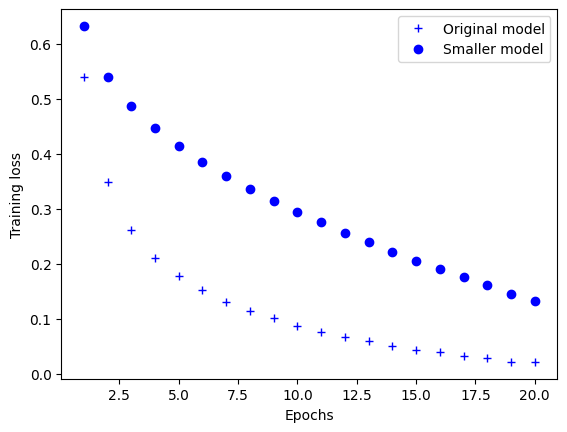

In [5]:
import matplotlib.pyplot as plt

epochs = range(1, 21)
original_train_loss = original_hist.history['loss']
smaller_model_train_loss = smaller_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_train_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

검증데이터에 대해서는 작은 신경망에서 과적합이 더 늦게 그리고 더 완만히 진행됩니다.

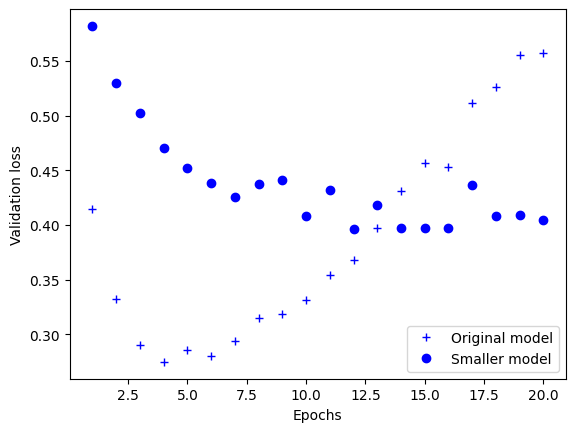

In [6]:
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# 과대적합 (overfitting)

은닉층의 뉴런수를 16에서 512로 늘린 큰 신경망을 만들고 학습시켜 보겠습니다.  
![](https://drive.google.com/thumbnail?id=1q0daZATKf8vTpHRtPelk0bcu9_CcgbLz&sz=s4000)

In [7]:
bigger_model = keras.Sequential([
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(1, activation="sigmoid")])

bigger_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

bigger_model_hist = bigger_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6456 - loss: 0.6528 - val_accuracy: 0.5732 - val_loss: 1.0349
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8182 - loss: 0.4352 - val_accuracy: 0.8774 - val_loss: 0.2972
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9030 - loss: 0.2533 - val_accuracy: 0.8788 - val_loss: 0.2956
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9263 - loss: 0.1897 - val_accuracy: 0.8793 - val_loss: 0.2958
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9360 - loss: 0.1666 - val_accuracy: 0.8891 - val_loss: 0.2853
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9647 - loss: 0.1029 - val_accuracy: 0.8873 - val_loss: 0.2844
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9812 - loss: 0.0667 - val_accuracy: 0.8845 - val_loss: 0.3597
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9845 - loss: 0.0537 - val_accuracy: 0.8819 - v

큰 모델의 파라미터 개수가 중간모델의 무려 33배나 됩니다.  
기억 용량도 33배라는 뜻이지요.

In [8]:
original_model.summary()
bigger_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,612 (1.22 MB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,307 (626.20 KB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,767,364 (41.07 MB)

 Trainable params: 5,383,681 (20.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,383,683 (20.54 MB)

훈련데이터에 대해서는 큰 신경망의 손실함수값이 빠르게 0으로 떨어집니다.  
그런데 학습 중간에 튀는 불안정한 현상을 볼수 있네요.

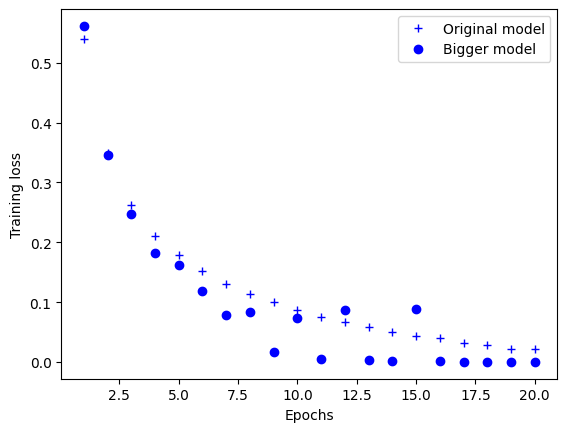

In [9]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

검증데이터에 대해서는 큰 신경망에서 과적합이 더 빨리 그리고 더 가파르게 그리고 더 불안정하게 진행됩니다.

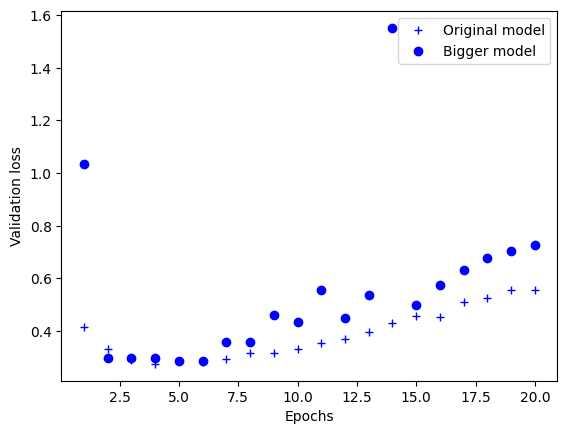

In [10]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# $L^2$-규제 ($L^2$-regularization)

우리는 $L^2$-규제에 대해 공부했습니다.  
기존 손실함수에 $L^2$ 페널티 ${1 \over 2} \times \lambda \times \sum w_{i,j}^2$를 더합니다.  
여기서 $w_{i,j}$는 모든 가중치를 뜻합니다.  
가중치 감소 계수 $\lambda$는 직접 설정해야 하는 하이퍼 파라미터입니다.  
크게 잡으면 페널티가 큰 역할을 하고 작게 잡으면 페널티 역할이 작아집니다.  
미분은 선형이기 때문에 새로운 손실함수의 그레디언트는 기존 손실함수의 그레디언트와 페널티의 그레디언트를 합한 것과 같습니다.  
경사하강법을 적용하면 각 그레디언트의 반대방향의 합으로 가중치를 업데이트합니다.  
각각은 정반대 역할을 합니다.  
기존 손실함수의 그레디언트의 반대방향으로 업데이트하면 신경망은 훈련데이터의 정보를 더 담아냅니다.  
$L^2$-페널티의 그레디언트의 반대방향 업데이트는 신경망의 가중치를 비슷하게 만드려는 경향이 있습니다.  
이는 습득한 정보를 뭉게버리는 효과가 있습니다.  
케라스에서는 [tf.keras.regularizers.L2](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L2)를 통해 구현되어 있습니다.  
[Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 클래스에서 인수로 설정할 수 있습니다.

In [12]:
from tensorflow.keras import regularizers

l2_model = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    Dense(1, activation="sigmoid")])

l2_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

l2_model_hist = l2_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7043 - loss: 0.7033 - val_accuracy: 0.8647 - val_loss: 0.4899
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8916 - loss: 0.4339 - val_accuracy: 0.8484 - val_loss: 0.4433
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9086 - loss: 0.3495 - val_accuracy: 0.8865 - val_loss: 0.3718
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9245 - loss: 0.3079 - val_accuracy: 0.8692 - val_loss: 0.3972
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9295 - loss: 0.2844 - val_accuracy: 0.8846 - val_loss: 0.3650
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9397 - loss: 0.2612 - val_accuracy: 0.8842 - val_loss: 0.3697
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9462 - loss: 0.2501 - val_accuracy: 0.8826 - val_loss: 0.3711
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9509 - loss: 0.2402 - val_accuracy: 0.8824 - val_loss

$L^2$-규제된 신경망은 학습데이터의 손실함수값이 일정 수준 이하로는 내려오질 않네요.

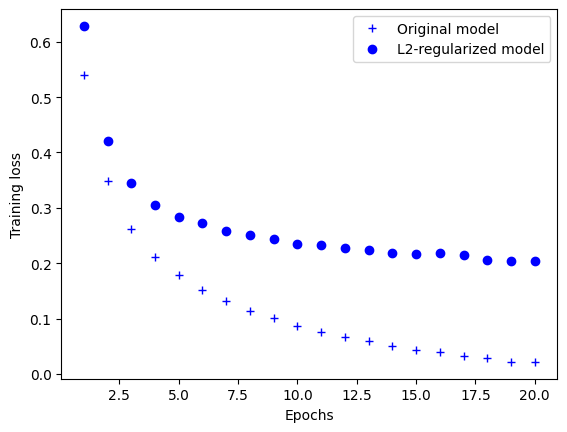

In [13]:
l2_model_loss = l2_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

$L^2$-규제된 신경망은 과적합이 억제되고 있습니다.

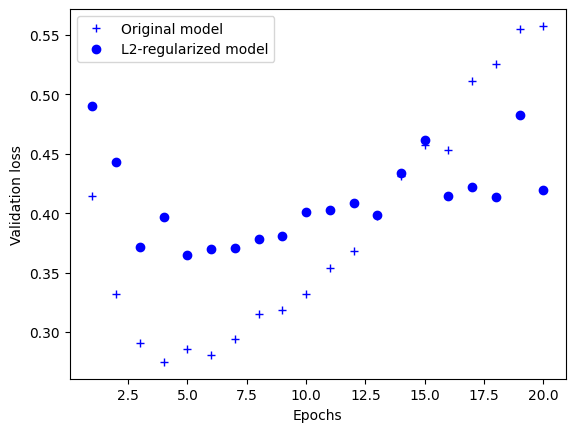

In [14]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

**[실습1] (10분) 가중치 감소 계수 $\lambda$를 약하게 $0.0002$로 잡은 모델과 강하게 $0.02$로 잡은 모델을 학습시키고 검증데이터의 손실함수 히스토리를 그래프로 그리시오.**

In [19]:
from tensorflow.keras import regularizers

l2_model02 = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(0.02), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l2(0.02), activation="relu"),
    Dense(1, activation="sigmoid")])

l2_model02.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

l2_model02_hist = l2_model02.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6639 - loss: 1.2043 - val_accuracy: 0.8443 - val_loss: 0.7738
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8629 - loss: 0.7332 - val_accuracy: 0.8679 - val_loss: 0.6786
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8789 - loss: 0.6551 - val_accuracy: 0.8537 - val_loss: 0.6506
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8796 - loss: 0.6137 - val_accuracy: 0.8010 - val_loss: 0.6741
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8679 - loss: 0.5904 - val_accuracy: 0.8690 - val_loss: 0.5749
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8863 - loss: 0.5488 - val_accuracy: 0.8723 - val_loss: 0.5525
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8901 - loss: 0.5229 - val_accuracy: 0.8730 - val_loss: 0.5329
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8891 - loss: 0.5042 - val_accuracy: 0.8556 - val_lo

In [20]:
from tensorflow.keras import regularizers

l2_model0002 = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(0.0002), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l2(0.0002), activation="relu"),
    Dense(1, activation="sigmoid")])

l2_model0002.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

l2_model0002_hist = l2_model0002.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7004 - loss: 0.6265 - val_accuracy: 0.8607 - val_loss: 0.4448
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8844 - loss: 0.3987 - val_accuracy: 0.8785 - val_loss: 0.3542
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9075 - loss: 0.2980 - val_accuracy: 0.8866 - val_loss: 0.3110
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9270 - loss: 0.2384 - val_accuracy: 0.8901 - val_loss: 0.2981
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9344 - loss: 0.2100 - val_accuracy: 0.8912 - val_loss: 0.2917
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9466 - loss: 0.1829 - val_accuracy: 0.8887 - val_loss: 0.2987
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9557 - loss: 0.1586 - val_accuracy: 0.8853 - val_loss: 0.3045
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9635 - loss: 0.1422 - val_accuracy: 0.8781 - val_loss

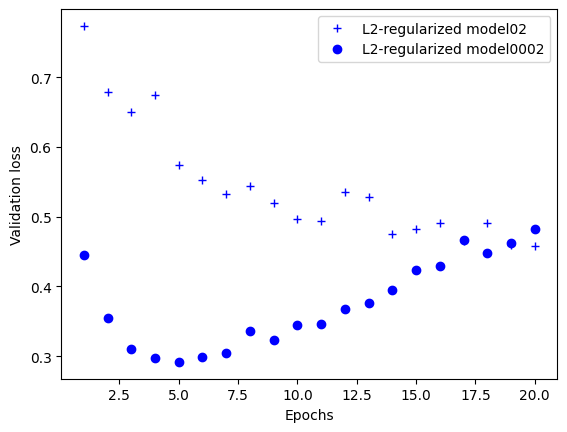

In [22]:
l2_model02_val_loss = l2_model02_hist.history['val_loss']
l2_model0002_val_loss = l2_model0002_hist.history['val_loss']

plt.plot(epochs, l2_model02_val_loss, 'b+', label='L2-regularized model02')
plt.plot(epochs, l2_model0002_val_loss, 'bo', label='L2-regularized model0002')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# $L^1$-규제 ($L^1$-regularization)

우리는 $L^1$-규제에 대해 공부했습니다.  
기존 손실함수에 $L^1$ 페널티 ${1 \over 2} \times \lambda \times \sum |w_{i,j}|$를 더합니다.  
여기서 $w_{i,j}$는 모든 가중치를 뜻합니다.  
가중치 감소 계수 $\lambda$는 직접 설정해야 하는 하이퍼 파라미터입니다.  
크게 잡으면 페널티가 큰 역할을 하고 작게 잡으면 페널티 역할이 작아집니다.  
미분은 선형이기 때문에 새로운 손실함수의 그레디언트는 기존 손실함수의 그레디언트와 페널티의 그레디언트를 합한 것과 같습니다.  
경사하강법을 적용하면 각 그레디언트의 반대방향의 합으로 가중치를 업데이트합니다.  
각각은 정반대 역할을 합니다.  
기존 손실함수의 그레디언트의 반대방향으로 업데이트하면 신경망은 훈련데이터의 정보를 더 담아냅니다.  
$L^1$-페널티의 그레디언트의 반대방향 업데이트는 절대값이 작은 가중치를 아예 없애버리려는 경향이 있습니다.  
이는 습득한 정보를 뭉게버리는 효과가 있습니다.  
케라스에서는 [tf.keras.regularizers.L1](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L1)를 통해 구현되어 있습니다.  
[Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 클래스에서 인수로 설정할 수 있습니다.

In [15]:
l1_model = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l1(0.001), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l1(0.001), activation="relu"),
    Dense(1, activation="sigmoid")])

l1_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

l1_model_hist = l1_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5638 - loss: 1.6465 - val_accuracy: 0.8105 - val_loss: 0.8283
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7619 - loss: 0.7569 - val_accuracy: 0.8421 - val_loss: 0.7351
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8110 - loss: 0.7044 - val_accuracy: 0.8457 - val_loss: 0.7089
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8332 - loss: 0.6748 - val_accuracy: 0.8553 - val_loss: 0.6494
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8465 - loss: 0.6318 - val_accuracy: 0.8121 - val_loss: 0.6428
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8493 - loss: 0.6044 - val_accuracy: 0.8560 - val_loss: 0.5919
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8645 - loss: 0.5740 - val_accuracy: 0.8639 - val_loss: 0.5641
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8722 - loss: 0.5481 - val_accuracy: 0.8618 - val_loss

**[실습2] (5분) 기본 신경망과 $L^1$-규제된 신경망의 훈련데이터에 대한 손실함수값 히스토리를 그래프로 그리시오.**

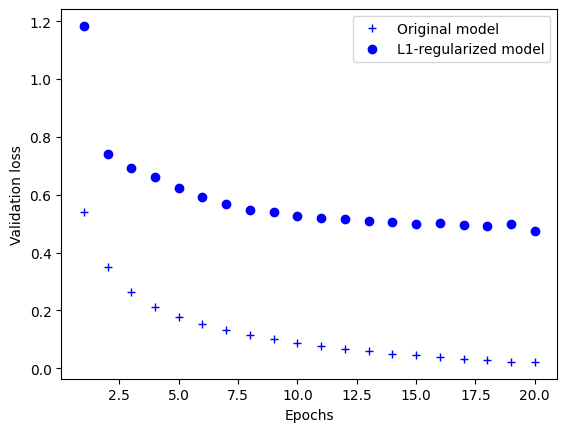

In [26]:
l1_model_train_loss = l1_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_train_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

**[실습3] (5분) 기본 신경망과 $L^1$-규제된 신경망의 검증데이터에 대한 손실함수값 히스토리를 그래프로 그리시오.**

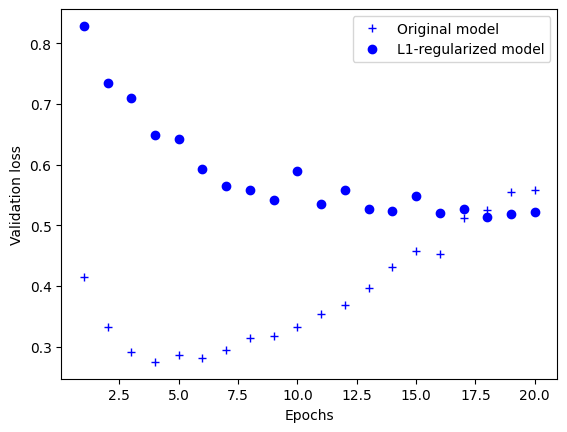

In [27]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# Dropout

이전에 공부한 dropout을 케라스로 구현하겠습니다.  
dropout은 학습 데이터가 들어올때마다 무작위로 뉴런을 삭제해서 신호전달을 차단하는 기법입니다.  
이상해보이지만 과적합 억제를 위해 매우 많이 사용되는 기법입니다.  
케라스에는 [Dropout층](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)이 구현되어 있습니다.  
몇 퍼센트를 삭제할지 인수로 지정해 줍니다.  
![](https://drive.google.com/thumbnail?id=1wPtyMrgWXGxiJp0YofJPGlYDDE94uoX-&sz=s4000)

/Users/vin_ah/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5617 - loss: 0.6755 - val_accuracy: 0.8377 - val_loss: 0.5634
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7181 - loss: 0.5710 - val_accuracy: 0.8641 - val_loss: 0.4476
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7811 - loss: 0.4866 - val_accuracy: 0.8786 - val_loss: 0.3775
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8388 - loss: 0.4091 - val_accuracy: 0.8859 - val_loss: 0.3236
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8629 - loss: 0.3603 - val_accuracy: 0.8874 - val_loss: 0.3010
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8797 - loss: 0.3207 - val_accuracy: 0.8865 - val_loss: 0.2909
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9020 - loss: 0.2816 - val_accuracy: 0.8868 - val_loss: 0.2897
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9084 - loss: 0.2529 - val_accuracy: 0.8924 - val_loss

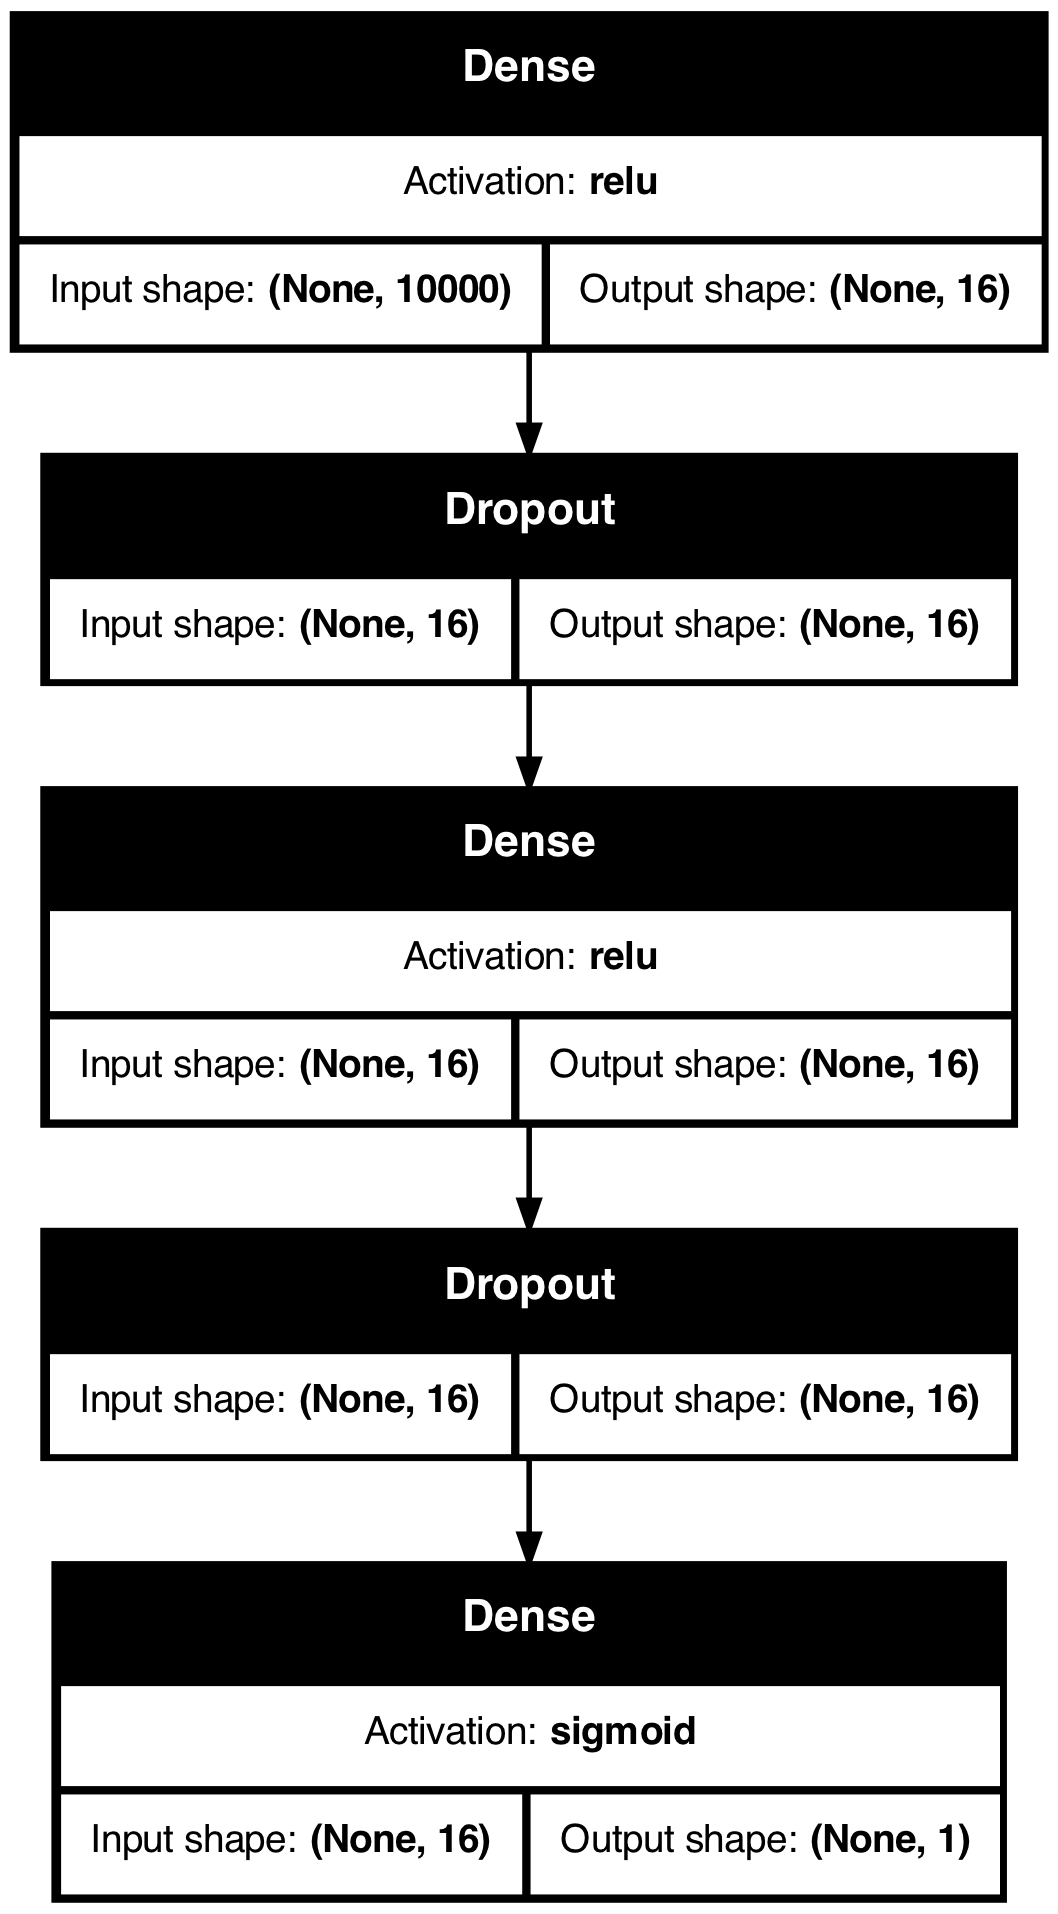

In [28]:
from tensorflow.keras.utils import plot_model
from keras.layers import Dropout

dropout_model = keras.Sequential([
    Dense(16, input_shape=(10000,), activation="relu"),
    Dropout(0.5),
    Dense(16, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")])

dropout_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

dropout_model_hist = dropout_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

plot_model(dropout_model, show_shapes=True, show_layer_activations=True)

dropout층이 추가된 신경망은 학습데이터의 손실함수값이 천천히 떨어지네요.

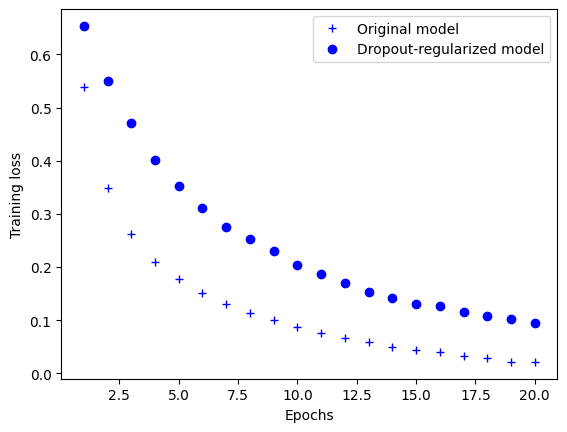

In [29]:
dropout_model_loss = dropout_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, dropout_model_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

dropout층이 추가된 신경망은 과적합이 늦게 시작되고 더 완만하게 진행됩니다.

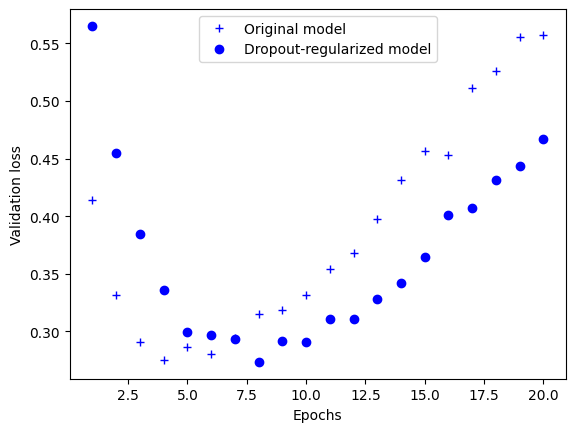

In [18]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dropout_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

**[실습4] (10분) dropout 비율을 약하게 $0.2$로 잡은 모델과 강하게 $0.8$로 잡은 모델을 학습시키고 검증데이터의 손실함수 히스토리를 그래프로 그리시오.**

In [32]:
from tensorflow.keras.utils import plot_model
from keras.layers import Dropout

dropout_weak_model = keras.Sequential([
    Dense(16, input_shape=(10000,), activation="relu"),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")])

dropout_weak_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

dropout_weak_model_hist = dropout_weak_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

dropout_strong_model = keras.Sequential([
    Dense(16, input_shape=(10000,), activation="relu"),
    Dropout(0.8),
    Dense(16, activation="relu"),
    Dropout(0.8),
    Dense(1, activation="sigmoid")])

dropout_strong_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

dropout_strong_model_hist = dropout_strong_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)



Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6491 - loss: 0.6276 - val_accuracy: 0.8529 - val_loss: 0.4368
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8454 - loss: 0.4178 - val_accuracy: 0.8806 - val_loss: 0.3309
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8887 - loss: 0.3170 - val_accuracy: 0.8583 - val_loss: 0.3424
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9053 - loss: 0.2687 - val_accuracy: 0.8896 - val_loss: 0.2795
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9293 - loss: 0.2137 - val_accuracy: 0.8791 - val_loss: 0.2992
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9415 - loss: 0.1751 - val_accuracy: 0.8899 - val_loss: 0.2826
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9522 - loss: 0.1518 - val_accuracy: 0.8874 - val_loss: 0.2874
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9596 - loss: 0.1348 - val_accuracy: 0.8838 - val_los

/var/folders/s2/kqf29pt97w527q67cq0htzc80000gn/T/ipykernel_61715/1220477723.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b+" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, original_val_loss, 'b+', label='Original model',  color='red')
/var/folders/s2/kqf29pt97w527q67cq0htzc80000gn/T/ipykernel_61715/1220477723.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b^" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, dropout_weak_model_val_loss, 'b^', label='Dropout-Weak-regularized model', color='green')


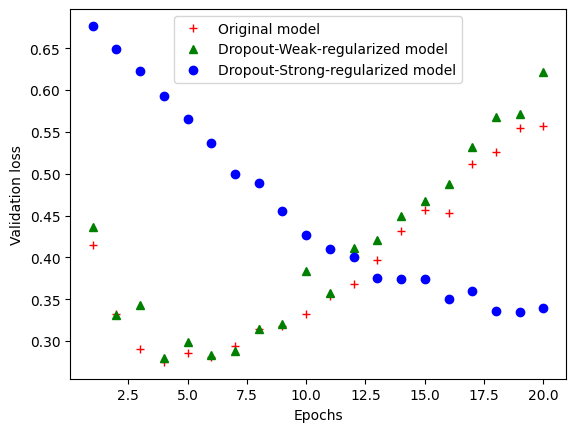

In [41]:
dropout_weak_model_val_loss = dropout_weak_model_hist.history['val_loss']
dropout_strong_model_val_loss = dropout_strong_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model',  color='red')
plt.plot(epochs, dropout_weak_model_val_loss, 'b^', label='Dropout-Weak-regularized model', color='green')
plt.plot(epochs, dropout_strong_model_val_loss, 'bo', label='Dropout-Strong-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

/Users/vin_ah/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6845 - loss: 0.5832 - val_accuracy: 0.8518 - val_loss: 0.5755
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9269 - loss: 0.2240 - val_accuracy: 0.8554 - val_loss: 0.5049
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9678 - loss: 0.1260 - val_accuracy: 0.8735 - val_loss: 0.4194
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9873 - loss: 0.0748 - val_accuracy: 0.8602 - val_loss: 0.3954
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9938 - loss: 0.0440 - val_accuracy: 0.8706 - val_loss: 0.3481
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9984 - loss: 0.0236 - val_accuracy: 0.8589 - val_loss: 0.3443
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9989 - loss: 0.0138 - val_accuracy: 0.8561 - val_loss: 0.3350
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9997 - loss: 0.0072 - val_accuracy: 0.8518 - val_loss

/var/folders/s2/kqf29pt97w527q67cq0htzc80000gn/T/ipykernel_61715/1691330278.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b+" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, original_val_loss, 'b+', label='Original model',  color='red')
/var/folders/s2/kqf29pt97w527q67cq0htzc80000gn/T/ipykernel_61715/1691330278.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b^" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, bn_true_model_val_loss, 'b^', label='BN model', color='green')


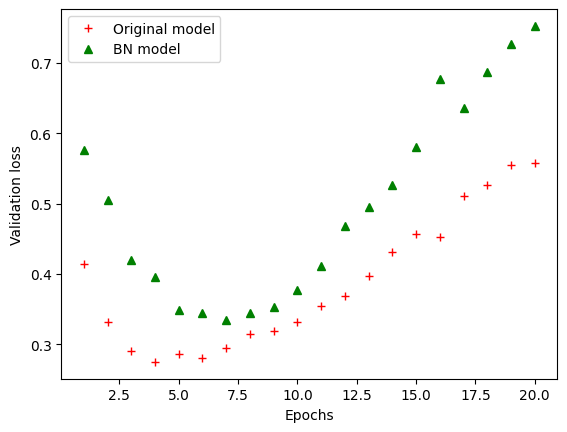

In [43]:
from keras.layers import BatchNormalization

bn_true_model = keras.Sequential([
    Dense(16, input_shape=(10000,), activation="relu"),
    BatchNormalization(),
    Dense(16, activation="relu"),
    BatchNormalization(),
    Dense(1, activation="sigmoid")])

bn_true_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

bn_true_model_hist = bn_true_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4, verbose=1)

bn_true_model_val_loss = bn_true_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model',  color='red')
plt.plot(epochs, bn_true_model_val_loss, 'b^', label='BN model', color='green')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [44]:
# 가중치 초기화 적용하기

from keras import initializers

model = keras.Sequential([
	Dense(16, kernel_initializer=initializers.HeNormal(), activation='relu'),
	Dense(16, kernel_initializer=initializers.HeUniform(), activation='relu'),
	Dense(1, kernel_initializer=initializers.GlorotNormal(), activation='sigmoid'),
	Dense(1, kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.05), activation='sigmoid')
])


In [47]:
# 모델 저장, 로드하기

bn_true_model.save('bn_model.keras')

# tensorflow : 2.15 이전 -> .h5
# tensorflow : 2.15 dlgn .keras

In [49]:
bn_model_new = keras.models.load_model('bn_model.keras')
bn_model_new.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,804 (1.22 MB)

 Trainable params: 160,369 (626.44 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 160,371 (626.45 KB)

In [ ]:
# decay



### decay

- 규제 : L1, L2(weight_decay)   
	   	weight_decay = 0.001 
		  
		Dense(16, kernel_regularizers.l2(weight_decay), activation='relu')

### learning rate를 점차 줄여가고 싶을 때

- sleep decay
- decay
- ...decay

### RMSProp 와 Learning rate Decay의 차이
1. RMSProp : 매개변수 적응형
2. lr : 아주 정밀한 학습을 위해서